# Barplot for denoising stats
Can only compare within dada2 for now but gives a nice barplot to follow how many sequences are lost at each denoising step 

In [19]:
#files = ['~/qbb2/tables/statss/2stats.tsv','~/qbb2/tables/statss/11stats.tsv']
import glob
files = glob.glob('/home/diana/qbb2/tables/statss/*.tsv')

In [27]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statistics

In [ ]:
def load_df(filenames):
    stats = []
    for filename in filenames:
        df = pd.read_csv(filename, sep='\t')
        stats.append(df)
    return stats

In [23]:
stats = load_df(files)
stats = pd.join(stats, sort = True)
stats = stats[list(stats.columns[-7:])]
stats = stats.drop(0)
numeric = ['denoised', 'filtered',  'input', 'merged', 'non-chimeric']
stats[numeric] = stats[numeric].apply(pd.to_numeric)
stats['% of Reads Remaining'] = stats['non-chimeric']/stats['input']*100

stats

,denoised,filtered,id,input,merged,non-chimeric,sample-id,% of Reads Remaining
1,20919.0,23637.0,/home/diana/qbb2/tables/statss/4stats.tsv,29380.0,17457.0,6988.0,16SV6-BB16.01A,23.784888
2,22279.0,25587.0,/home/diana/qbb2/tables/statss/4stats.tsv,33202.0,18171.0,6884.0,16SV6-BB16.02A,20.733691
3,24906.0,28219.0,/home/diana/qbb2/tables/statss/4stats.tsv,36188.0,21500.0,6756.0,16SV6-BB16.03A,18.669172
4,27227.0,29579.0,/home/diana/qbb2/tables/statss/4stats.tsv,37793.0,23462.0,9956.0,16SV6-BB16.04A,26.343503
5,21475.0,24497.0,/home/diana/qbb2/tables/statss/4stats.tsv,31911.0,17759.0,6079.0,16SV6-BB16.05A,19.049857
...,...,...,...,...,...,...,...,...
196,23741.0,24963.0,/home/diana/qbb2/tables/statss/13stats.tsv,29137.0,20575.0,16780.0,16SV6-BB16.8C,57.590006
197,23631.0,24819.0,/home/diana/qbb2/tables/statss/13stats.tsv,28725.0,20216.0,18081.0,16SV6-BB16.8D,62.945170
198,20722.0,22057.0,/home/diana/qbb2/tables/statss/13stats.tsv,25685.0,17679.0,13604.0,16SV6-BB16.9B,52.964765
199,26101.0,27483.0,/home/diana/qbb2/tables/statss/13stats.tsv,31792.0,22124.0,17079.0,16SV6-BB16.9C,53.721062


In [32]:
df = stats[['sample-id','% of Reads Remaining','id']]
df = df.melt.to_dataframe()

#df = df.groupby('sample-id').mean()


df

AttributeError: 'function' object has no attribute 'to_dataframe'

In [21]:
def load_df(filenames):
    stats = []
    for filename in filenames:
        df = pd.read_csv(filename, sep='\t')
        df['id'] = filename 
        stats.append(df)
    return stats

In [235]:
stats = load_df(files)
stats = pd.concat(stats)
stats = stats[list(stats.columns[-7:])]
stats = stats.drop(0)
numeric = ['denoised', 'filtered',  'input', 'merged', 'non-chimeric']
stats[numeric] = stats[numeric].apply(pd.to_numeric)

##fin stuff
stats = stats.groupby('id').sum()
stats = stats.drop('/home/diana/qbb2/tables/statss/stats.tsv')
df = pd.melt(stats.reset_index(), id_vars='id', var_name='step', value_name='read_number')
input_read_num = df['read_number'].max()
df['% of Reads Remaining'] = df['read_number'] / input_read_num * 100
step_order = {'input': 0, 'filtered': 1, 'denoised': 2, 'merged': 3, 'non-chimeric': 4}
df['order'] = df['step'].apply(lambda x: step_order[x])
df = df.reset_index()

/home/diana/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [236]:
df['Run Number'] = df['id'].str.split('/').str.get(-1).str.replace('stats.tsv', '')
df['Run Number'] = "Run " + df['Run Number']
hue_order = df.query('step == "non-chimeric"').sort_values('% of Reads Remaining', ascending=False)['Run Number']

In [259]:
sns.set_style('whitegrid')
sns.set_context('talk')

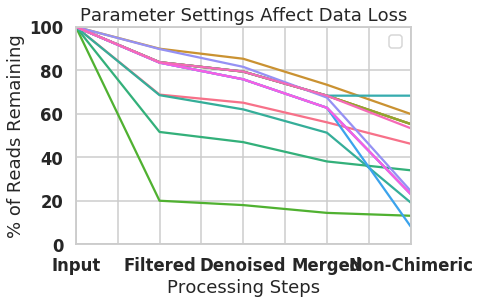

In [260]:
sns.lineplot(data = df, y='% of Reads Remaining', x='order', hue='Run Number')
#plt.legend(bbox_to_anchor=(1.5,1.5))
plt.legend('')
plt.ylim(0, 100)
plt.xlim(0, 4)
plt.xticks([x/2 for x in range(0, 9)] , ['Input', '', 'Filtered', '', 'Denoised','', 'Merged', '', 'Non-Chimeric'])
plt.xlabel('Processing Steps')
plt.title('Parameter Settings Affect Data Loss')
plt.savefig('diana.svg')

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

In [14]:
def clean( lst ):
    # lst is a tuple of (dataframe, nameofdf) and cols is the name of the columns
    sums = pd.DataFrame(data=None, columns=['Input','Filtered','Denoised','Merged','Non-chimeric']) #, columns=cols) #sums is the df with the sums for each denoising steps
    filenames = []
    for t in lst:
        df = t[0].drop(t[0].index[0])
        df.iloc[:,1:6] = df.iloc[:,1:6].apply(pd.to_numeric)
        sums = sums.append(df.iloc[:,1:6].sum(), ignore_index=True)
        filenames.append(t[1])
    index = pd.DataFrame({'id':filenames})
    sums = sums.join(index)
    sums = sums.set_index("id")
    
    rc('font', weight='bold') # y-axis in bold
    r = [0,1] # The position of the bars on the x-axis
    names = files #of groups
    barWidth = 1
    Step=['Input','Filtered','Denoised','Merged','Non-chimeric']
    color = ['darkorange','orange','sandybrown','navajowhite','blanchedalmond']

    plt.bar(r, sums.loc[:,'input'], color='darkorange', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'filtered'], color='orange', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'denoised'], color='sandybrown', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'merged'], color='navajowhite', edgecolor='white', width=barWidth)
    plt.bar(r, sums.loc[:,'non-chimeric'], color='blanchedalmond', edgecolor='white', width=barWidth)
    
    # Custom axis
    plt.xticks(r, ['Trimming 1', 'Parameter 2'], fontweight='bold')
    plt.xlabel("Method")
    plt.ylabel("Sequencing depth")
    
    # Show graphic
    plt.legend(Step,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    return sums, plt.show()

In [16]:
clean(files)

AttributeError: 'str' object has no attribute 'drop'

In [15]:
sums, cleaned = clean(stats)
cleaned
plt.savefig('blop.png', dpi=300)

AttributeError: 'str' object has no attribute 'drop'

In [ ]:
sns.pairplot

In [85]:
step_order = ['input', 'filtered', 'denoised', 'merged', 'non-chimeric']


In [82]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [89]:
df

,id,Step,value,max,prop,order
0,~/qbb2/tables/statss/2stats.tsv,denoised,4.11232e+06,5.42017e+06,75.870628,2.0
1,~/qbb2/tables/statss/11stats.tsv,denoised,4.30484e+06,5.42017e+06,79.422620,2.0
2,~/qbb2/tables/statss/2stats.tsv,filtered,4.52915e+06,5.42017e+06,83.561032,1.0
3,~/qbb2/tables/statss/11stats.tsv,filtered,4.5398e+06,5.42017e+06,83.757502,1.0
4,~/qbb2/tables/statss/2stats.tsv,input,5.42017e+06,5.42017e+06,100.000000,0.0
5,~/qbb2/tables/statss/11stats.tsv,input,5.42017e+06,5.42017e+06,100.000000,0.0
6,~/qbb2/tables/statss/2stats.tsv,merged,3.40308e+06,5.42017e+06,62.785392,3.0
7,~/qbb2/tables/statss/11stats.tsv,merged,3.7051e+06,5.42017e+06,68.357690,3.0
8,~/qbb2/tables/statss/2stats.tsv,non-chimeric,1.25452e+06,5.42017e+06,23.145436,4.0
9,~/qbb2/tables/statss/11stats.tsv,non-chimeric,2.99869e+06,5.42017e+06,55.324648,4.0


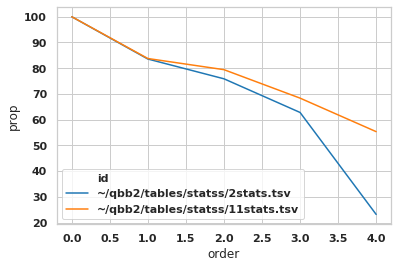

In [91]:
sns.lineplot(data = df, y='prop', x='order', hue='id')